In [1]:
######## dataset downloaded ##########
# import opendatasets as od
# od.download('https://www.kaggle.com/zalando-research/fashionmnist')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #  for avoid unwanted warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML # for HTMl tag use in python

In [66]:
df = pd.read_csv('fashion-mnist_train.csv')

In [67]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x = df.iloc[:,1:].values

In [6]:
y = df.iloc[:,0].values

In [65]:
a = x[0].reshape(28,28) # row_0 of df

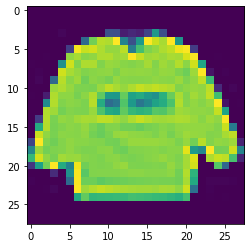

In [104]:
plt.imshow(a) # imshow uses for RGB pixels speacially for images

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=22)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)

In [11]:
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [12]:
y_predict = classifier.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_predict)
display(HTML(f'Accuracy is <b>{round(accuracy*100,2)}</b>%'))

# Features Scaling

In [14]:
# all values convert between 0 to 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Apply PCA

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # how many need features between min =1 and max=784
# n_components=None means we created whole 784 features craeted
x_train_new = pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)

In [23]:
print(x_train_new.shape)
print(x_train_new.shape)

(48000, 50)
(48000, 50)


In [24]:
pca.explained_variance_ratio_

array([0.21992523, 0.14414259, 0.05468448, 0.05131536, 0.04057463,
       0.03006202, 0.02738383, 0.02323433, 0.01697243, 0.01312239,
       0.01159893, 0.00968816, 0.00888235, 0.00855323, 0.00748589,
       0.00735059, 0.00664918, 0.00640707, 0.006248  , 0.00576312,
       0.00519327, 0.00507804, 0.00475258, 0.00452477, 0.00441375,
       0.00418921, 0.00394789, 0.00383256, 0.00377394, 0.00373435,
       0.00366411, 0.00354971, 0.00339393, 0.00331633, 0.00326355,
       0.0031677 , 0.00308813, 0.00295302, 0.00284626, 0.00279425,
       0.0027166 , 0.0026856 , 0.00255868, 0.00254049, 0.00246045,
       0.00238008, 0.00234548, 0.00222953, 0.00220377, 0.00212364])

In [25]:
classifier.fit(x_train_new,y_train)

KNeighborsClassifier()

In [27]:
y_predict_new = classifier.predict(x_test_new)

In [29]:
accuracy_new = accuracy_score(y_test,y_predict_new)
display(HTML(f'Accuracy is <b>{round(accuracy_new*100,2)}</b>%'))

# we will use PCA over KNN coz,
##### 1) PCA done with less number of features than KNN but still give almost same accuracy
##### 2) PCA take less time than KNN